# Solving some classic problems with numpy scipy  

----

By Adam A Miller (Northwestern/CIERA/SkAI)  
10 Sept 2025

As a partial, but certainly not complete (!), example of the utility of `numpy` and `scipy`, this notebook includes some classic problems in physics and solves them numerically. There is also an introduction to random numbers and a brief discussion of monte carlo methods. 

In [1]:
import numpy as np

## Problem 1) The damped harmonic oscillator

A damped harmonic oscillator can be described by three parameters: $m$ the mass of the oscillator, $k$ the spring constant, and $c$ the damping coefficient. 

The equation of motion for this system for this system is: 

$$mx'' + cx' + kx = 0$$

We can solve this ordinary differential equation using scipy. If the initial conditions (i.e., the initial displacement and velocity) are known, then we can evolve the system in time to characterize its motion. 

**Problem 1a**

Write a function `damped_oscillator()` that will return the derivatives ($x'$ and $x''$) for the ODE at times t as a list $[dx/dt, dv/dt]$. The input for the function should be times `t` and a tuple `sv` that contains the state vector of the system (i.e., the position and velocity of the system). Assume that the three parameters $m, k, c$ are known. 

*Hint* – we must write the function in such a way that it can be solved as an initial value problem in `scipy` with [`solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html).

In [7]:
def damped_oscillator(t, sv):
    x, v = sv
    xdot = v
    xdotdot = -(1/m)*(c*xdot+k*x)
    return [xdot, xdotdot]

**Problem 1b**

Use the initial conditions below to solve the initial value problem with `solve_ivp`. 

The inputs for `solve_ivp` are: `fun`: the function from above that will return the derivatives as a 1D array, `t_span`: a 2-tuple (t0, tf) giving the start and end times for the initial value problem, `sv0`: the initial displacement and velocity, and (optional argument) `t_eval` an array of times at which the solution will be reported.

In [ ]:
from scipy.integrate import solve_ivp

In [9]:
m = 1.0                       # kg
f0 = 2.5                      # Hz (un-damped natural frequency in Hz)
omega0 = 2*np.pi*f0           # rad/s
k = m * omega0**2             # N/m
zeta = 0.10                   # damping ratio (underdamped if 0 < zeta < 1)
c = 2 * zeta * m * omega0     # N*s/m

# Initial conditions
sv0 = [1.0, 0.0]  # initial displacement and velocity
t_span = (0, 20)
t_eval = np.linspace(*t_span, 500)

sol = solve_ivp(damped_oscillator, t_span, sv0, t_eval=t_eval) # complete

**Problem 1c**

Print the solution `sol` to determine its attributes. Did you successfully solve the ODE?

In [19]:
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 1424
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.04008016,  0.08016032,  0.12024048,  0.16032064,
        0.2004008 ,  0.24048096,  0.28056112,  0.32064128,  0.36072144,
        0.4008016 ,  0.44088176,  0.48096192,  0.52104208,  0.56112224,
        0.6012024 ,  0.64128257,  0.68136273,  0.72144289,  0.76152305,
        0.80160321,  0.84168337,  0.88176353,  0.92184369,  0.96192385,
        1.00200401,  1.04208417,  1.08216433,  1.12224449,  1.16232465,
        1.20240481,  1.24248497,  1.28256513,  1.32264529,  1.36272545,
        1.40280561,  1.44288577,  1.48296593,  1.52304609,  1.56312625,
        1.60320641,  1.64328657,  1.68336673,  1.72344689,  1.76352705,
        1.80360721,  1.84368737,  1.88376754,  1.9238477 ,  1.96392786,
        2.00400802,  2.04408818,  2.08416834,  2.1242485 ,  2.16432866,
        2.20440882,  2.24448

**Problem 1d**

Plot the numerical solution for the position as a function of time.

Does the plot correspond with your expectation? Why or why not?

*Note* – feel free to skip this, especially if you are not familiar with `matplotlib`.

In [86]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [23]:
sol.y[0]

array([ 1.00000000e+00,  8.16010742e-01,  3.59744799e-01, -1.72438153e-01,
       -5.79035918e-01, -7.29126466e-01, -5.98375217e-01, -2.67592509e-01,
        1.20383769e-01,  4.19119434e-01,  5.31347942e-01,  4.38772738e-01,
        1.99090090e-01, -8.40307073e-02, -3.03184104e-01, -3.87270721e-01,
       -3.21638108e-01, -1.47974043e-01,  5.84384275e-02,  2.19374014e-01,
        2.82147562e-01,  2.35832402e-01,  1.09992508e-01, -4.05845000e-02,
       -1.58656023e-01, -2.05624900e-01, -1.72820046e-01, -8.16904202e-02,
        2.80936755e-02,  1.14755591e-01,  1.49772584e-01,  1.26704628e-01,
        6.06662212e-02, -1.93897453e-02, -8.29760844e-02, -1.09140040e-01,
       -9.28207916e-02, -4.50260190e-02,  1.33470593e-02,  5.99906421e-02,
        7.94786041e-02,  6.80456494e-02,  3.34078357e-02, -9.14171456e-03,
       -4.33699555e-02, -5.79001630e-02, -4.98398839e-02, -2.47848629e-02,
        6.23924677e-03,  3.13408602e-02,  4.21678359e-02,  3.65288309e-02,
        1.83786641e-02, -

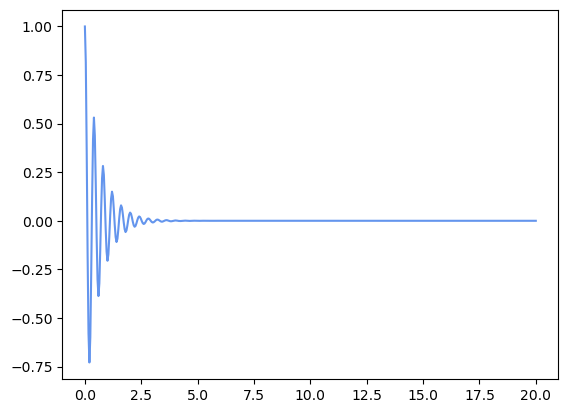

In [87]:
plt.plot(sol.t, sol.y[0], color='cornflowerblue')

## Problem 2) Random number generation

`numpy` has several built in modules to generate (psuedo) random numbers. These are extremely useful for different types of [monte carlo]() tests, where random numbers are drawn to assess different types of probabistic outcomes. 

**Problem 2a** 

`numpy` can generate a random number over the interval $[0, 1)$ using the (`numpy.random.rand()`)[https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html] method. The argument to this function is the dimensions of the array that you would like to be returned. 

Generate a single number between 0 and 1.

In [33]:
print(f'The random number is {np.random.rand(1)}') # complete

The random number is [0.58549769]


**Problem 2b**

Generate 100 random numbers. What is the minimum, maximum, and mean of the numbers that have been drawn? 

In [34]:
rns = np.random.rand(100)

print(f'''The minimum is {np.min(rns):.3f}, 
the maximum is {np.max(rns):.3f}, 
and the mean is {np.mean(rns):.3f}''')

The minimum is 0.003, 
the maximum is 0.974, 
and the mean is 0.478


**Problem 2c**

If you instead generate 10,000 random numbers, do you get answers for the min, max, and mean that are closer to your expectations? 

In [35]:
rns = np.random.rand(1000)

print(f'''The minimum is {np.min(rns):.3f}, 
the maximum is {np.max(rns):.3f}, 
and the mean is {np.mean(rns):.3f}''')

The minimum is 0.001, 
the maximum is 1.000, 
and the mean is 0.508


**Problem 2d**

Using [`numpy.random.Generator.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) generate 500 random numbers from a Gaussian distribution with a mean of $1851$ and a standard deviation of 6. 

What is the mean and the standard deviation for the randomly generated numbers? Are the answers consistent with your expectations? (what if you change the number of samples?)

*Hint* – be sure that you calculate the *sample* standard deviation.

In [141]:
rng = np.random.normal(loc=1851, scale=6, size=500)

print(np.mean(rng))
print(np.std(rng, ddof=1))

1851.1344381538102
6.129337138203697


**Problem 3a** 

To simulate a random walk, draw a random number for a 2D Gaussian distibution where the mean along both axes is 0 and the standard deviation along both axes is 1. (You may assume there is no covariance between the two axes)

*Hint* – if you don't want to use `numpy.random.normal` you can use the [`numpy.Generator.random.multivariate_normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.multivariate_normal.html#numpy.random.Generator.multivariate_normal) method.

In [140]:
rng = np.random.normal(loc=0, scale=1, size=(500,2))

print(np.mean(rng, axis=0))
print(np.std(rng, ddof=1, axis=0))

[ 0.01362983 -0.09242975]
[0.97560307 1.0460126 ]


**Problem 3b**

Create a walker that 100 steps. What is the final position of the walker? 

Has it moved more or less than you expected? 

In [102]:
nsteps = np.random.normal(loc=0, scale=1, size=(100,2))

traj = np.cumsum(np.diff(nsteps, axis=0), axis=0)

print(f'The walker has moved to {traj[-1]}')  # complete

The walker has moved to [-0.06429514 -1.48417626]


**Problem 3c**

Simulate 1000 different walkers that each proceed for 10 steps. 

Plot the final position of each walker after 10 steps. Calculate the average position of each walker after 10 steps. Calculate the average distance from the origin of each walker.

In [119]:
nsteps = np.random.normal(loc=0, scale=1, size=(1000,10,2))

final_pos = np.sum(nsteps, axis=1)

final_d = np.linalg.norm(final_pos, axis=1)
print(f'The average distance is {np.mean(final_d)}')

The average distance is 3.940615292134914


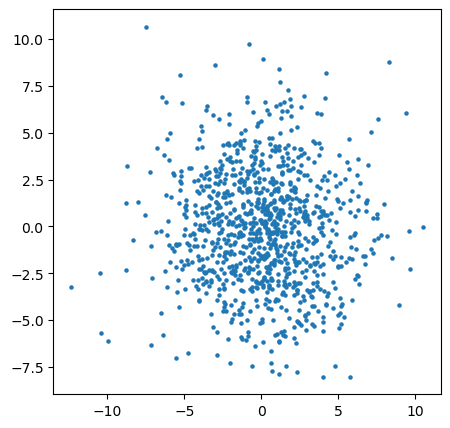

In [120]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(final_pos[:,0], final_pos[:,1], s=5) # complete

**Problem 3d**

Repeat this problem for 1000 walkers and 100 steps. Same thing for 1000 steps. Make a single plot showing the results for all three of these runs. 

Do the results make sense? 

In [135]:
def random_walk(walkers, stepnumber, dim):
    nsteps = np.random.normal(loc=0, scale=1, size=(walkers,stepnumber,dim))
    final_pos = np.sum(nsteps, axis=1)
    final_dist = np.mean(np.linalg.norm(final_pos, axis=1))
    return final_pos, final_dist

In [136]:
s10fp, s10d = random_walk(1000, 10, 2)
s100fp, s100d = random_walk(1000, 100, 2)
s1000fp, s1000d = random_walk(1000, 1000, 2)

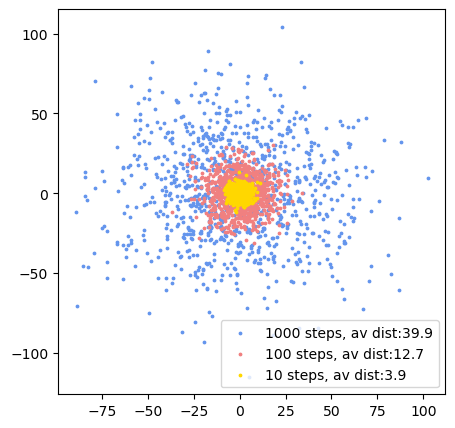

In [139]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

ax.scatter(s1000fp[:,0], s1000fp[:,1], s=3, color='cornflowerblue', label=f'1000 steps, av dist:{s1000d:0.1f}')
ax.scatter(s100fp[:,0], s100fp[:,1], s=3, color='lightcoral', label=f'100 steps, av dist:{s100d:0.1f}')
ax.scatter(s10fp[:,0], s10fp[:,1], s=3, color='gold', label=f'10 steps, av dist:{s10d:0.1f}')

ax.legend(fontsize=10)

plt.show()